<a href="https://colab.research.google.com/github/MartinFarres/pumpkin_dataset-MultiLayerPerceptor/blob/main/pumpkin_dataset_PerceptorMulticapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
import pandas as pd

# Load the Excel file
excel_file_path = './content/pumpkin_seeds_dataset/Pumpkin_Seeds_Dataset.xlsx'
df = pd.read_excel(excel_file_path)

# Display the first few rows
print("First 5 rows of the DataFrame:")
display(df.head())

# Display column information
print("\nColumn information:")
display(df.info())

First 5 rows of the DataFrame:


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik



Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


None

In [ ]:
# Identify unique values in the 'Class' column
unique_classes = df['Class'].unique()
print("Unique classes in the 'Class' column:", unique_classes)

# Create a mapping dictionary
class_mapping = {unique_classes[0]: 0, unique_classes[1]: 1}
print("Class mapping dictionary:", class_mapping)

# Apply the mapping to the 'Class' column
df['Class'] = df['Class'].map(class_mapping)

# Display the first 5 rows of the updated DataFrame
print("\nFirst 5 rows of the DataFrame after converting 'Class' to numerical values:")
display(df.head())

Unique classes in the 'Class' column: ['Çerçevelik' 'Ürgüp Sivrisi']
Class mapping dictionary: {'Çerçevelik': 0, 'Ürgüp Sivrisi': 1}

First 5 rows of the DataFrame after converting 'Class' to numerical values:


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0


In [ ]:
# SPLIT DATA

from sklearn.model_selection import train_test_split
import numpy as np

# Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Convert to numpy arrays
X = X.values
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2000, 12)
Shape of X_test: (500, 12)
Shape of y_train: (2000,)
Shape of y_test: (500,)


In [ ]:
# CREATE TENSORS
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert y labels to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Model class that inherits nn.Module
class Model(nn.Module):
  # Input layer ( x features of the pumpkings) --> Hidden Layer1  --> Hidden Layer2 --> Output (2 Classes of pumpkin seeds)
  def __init__(self, input_features=12, h1=9,h2=13, out_features=2):
    super().__init__()
    # fully connected hidden layer 1
    self.fc1 = nn.Linear(input_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x) # No activation function needed here when using CrossEntropyLoss
    return x

In [ ]:
# Pick manual seed for randomization
torch.manual_seed(41)
# instance of the model
model = Model()


In [ ]:
# Set the criterion of model to measure the error
criterion = nn.CrossEntropyLoss()
# Choose Optimizer and LR
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Create TensorDatasets
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

# TRAIN MODEL
epochs = 20
losses = []

for epoch in range(epochs):
    model.train() # Set train mode
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        # Forward pass (traverses the entire NN) and outputs predictions
        outputs = model(X_batch)

        # Measures the error
        loss = criterion(outputs, y_batch)

        # Backward pass + optimization
        optimizer.zero_grad() # Clears gradients of previous epoch
        loss.backward() # Magic of backpropagation
        optimizer.step() # Updates the model's parameters

        running_loss += loss.item()

    # Append the average training loss to the losses list
    losses.append(running_loss/len(train_loader))

    # Evaluate on test set after each epoch
    model.eval() # Set evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], "
          f"Train Loss: {running_loss/len(train_loader):.4f}, "
          f"Test Loss: {val_loss/len(test_loader):.4f}")

Epoch [1/20], Train Loss: 1386.1373, Test Loss: 1284.6799
Epoch [2/20], Train Loss: 1305.8449, Test Loss: 1206.3607
Epoch [3/20], Train Loss: 1218.1991, Test Loss: 1128.4815
Epoch [4/20], Train Loss: 1144.7217, Test Loss: 1051.1628
Epoch [5/20], Train Loss: 1059.5006, Test Loss: 972.1876
Epoch [6/20], Train Loss: 977.0391, Test Loss: 892.2348
Epoch [7/20], Train Loss: 890.4985, Test Loss: 813.2323
Epoch [8/20], Train Loss: 811.1177, Test Loss: 733.2816
Epoch [9/20], Train Loss: 728.0707, Test Loss: 652.2177
Epoch [10/20], Train Loss: 638.3024, Test Loss: 571.3412
Epoch [11/20], Train Loss: 557.3289, Test Loss: 490.8756
Epoch [12/20], Train Loss: 472.1778, Test Loss: 409.3575
Epoch [13/20], Train Loss: 384.5458, Test Loss: 326.7681
Epoch [14/20], Train Loss: 299.8391, Test Loss: 244.5618
Epoch [15/20], Train Loss: 212.7790, Test Loss: 161.0042
Epoch [16/20], Train Loss: 125.6271, Test Loss: 77.6726
Epoch [17/20], Train Loss: 38.1818, Test Loss: 2.7062
Epoch [18/20], Train Loss: 0.8371, 

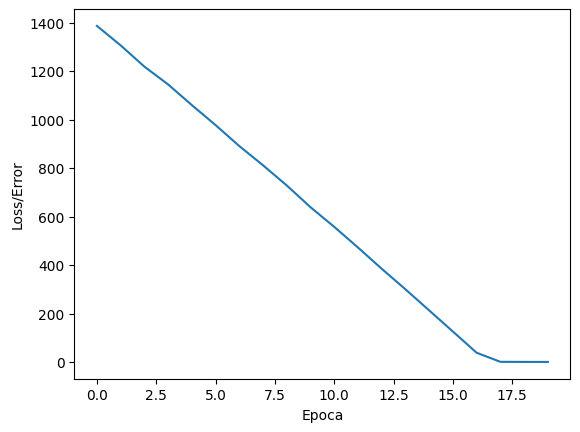

In [ ]:
import matplotlib.pyplot as plt
# Graph loss/error - epochs
plt.plot(range(epochs), losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epoca')
plt.show()

In [ ]:
# Evaluate Model on Test Data
with torch.no_grad(): # Turn off backpropagation
  y_eval = model.forward(X_test) # predictions from our test set
  loss = criterion(y_eval, F.one_hot(y_test, num_classes=y_eval.shape[1]).float())


In [ ]:
loss

tensor(0.4133)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model(data)
    print(f'{i+1}) \nPredicted: {y_val.argmax().item()} \nActual: {y_test[i]}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')

1) 
Predicted: 0 
Actual: 0
2) 
Predicted: 0 
Actual: 0
3) 
Predicted: 1 
Actual: 1
4) 
Predicted: 1 
Actual: 0
5) 
Predicted: 1 
Actual: 1
6) 
Predicted: 0 
Actual: 0
7) 
Predicted: 1 
Actual: 1
8) 
Predicted: 0 
Actual: 0
9) 
Predicted: 1 
Actual: 1
10) 
Predicted: 0 
Actual: 0
11) 
Predicted: 0 
Actual: 0
12) 
Predicted: 1 
Actual: 0
13) 
Predicted: 0 
Actual: 1
14) 
Predicted: 0 
Actual: 0
15) 
Predicted: 1 
Actual: 0
16) 
Predicted: 1 
Actual: 1
17) 
Predicted: 1 
Actual: 1
18) 
Predicted: 1 
Actual: 1
19) 
Predicted: 0 
Actual: 0
20) 
Predicted: 1 
Actual: 0
21) 
Predicted: 0 
Actual: 1
22) 
Predicted: 1 
Actual: 1
23) 
Predicted: 0 
Actual: 1
24) 
Predicted: 0 
Actual: 0
25) 
Predicted: 0 
Actual: 0
26) 
Predicted: 0 
Actual: 1
27) 
Predicted: 0 
Actual: 1
28) 
Predicted: 1 
Actual: 1
29) 
Predicted: 0 
Actual: 0
30) 
Predicted: 1 
Actual: 1
31) 
Predicted: 0 
Actual: 0
32) 
Predicted: 1 
Actual: 1
33) 
Predicted: 0 
Actual: 1
34) 
Predicted: 0 
Actual: 0
35) 
Predicted: 1 
Actu

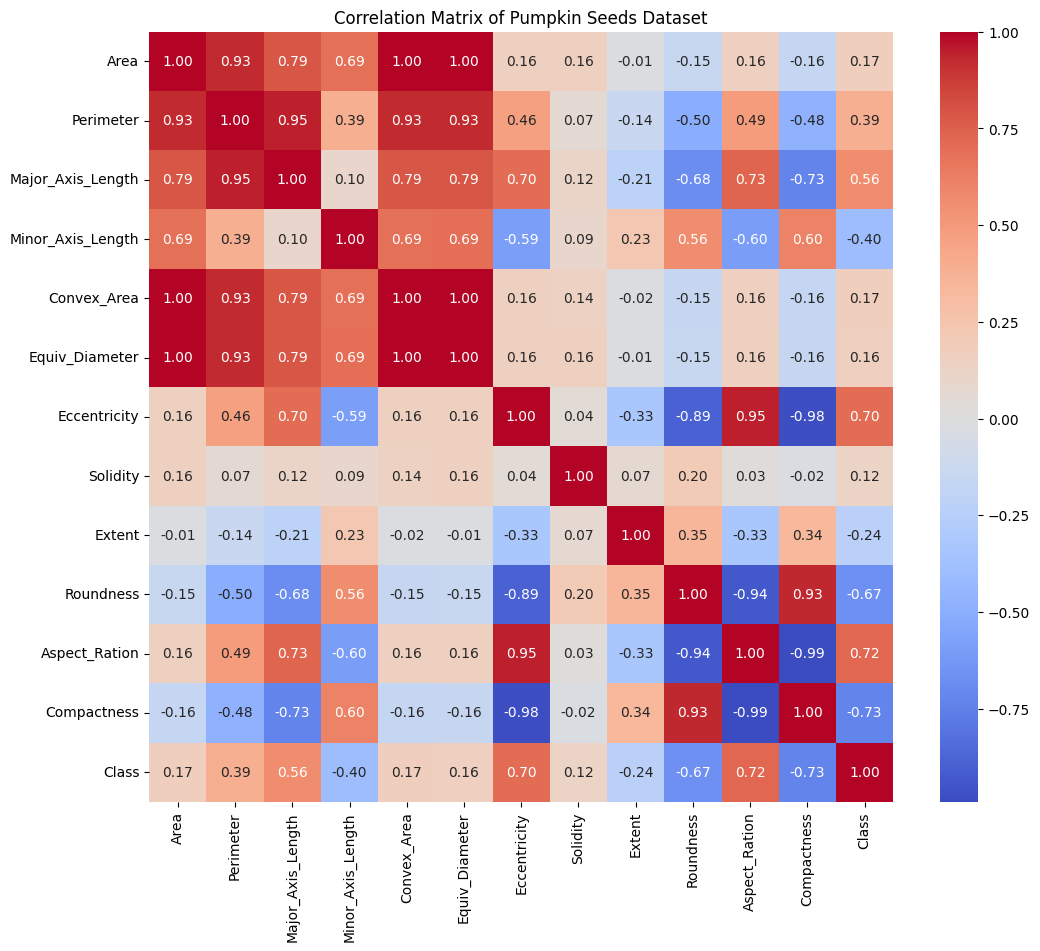

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pumpkin Seeds Dataset')
plt.show()